# Problem Set 2


## An econometric analysis of Engel curves for U.S. households
In problem set 1, we undertook the initial analysis of the data and discussed regression models of Engel curves for food, clothes and alcohol. The objective of this week’s problem set is to estimate a simple regression model of the Engel curve using the OLS estimator.

The starting point is a regression model with one explanatory variable. Specifically, let us consider the case where the dependent variable represents food expenditures, while the explanatory variable is total expenditure:

\begin{align}
\text{xfath}_i = \beta_0 + \beta_1 \text{xtot}_i + u_i \tag{1}
\end{align}

In the consumption literature, it is common to use expenditure share, $\text{xfath}/\text{xtot}$, as the dependent variable instead of using total food expenditures. Furthermore, the logarithm of total expenditure deflated by an individual ”consumer price index” is often used as the explanatory variable. In this case, the regression model is:

\begin{align}
\frac{\text{xfath}_i}{\text{xtot}_i} = \delta_0 + \delta_1 \log \left(\frac{\text{xtot}_i}{\text{price}_i}
\right) + v_i \tag{2}
\end{align}


## Group work: Discuss model (2)

### Question 1
**Task:** What is the interpretation of $\delta_1$ when $%
\delta_1>0$ and $\delta_1<0$? 
(Hint: luxury versus necessity goods)

**Your answer:**

When $\delta_1$ is larger than 0, food constitutes a larger portion of total expenditure when total expenditure increases. In this case, food is a luxury good.

On the contrary, when $\delta_0$ is less than zero, food constitutes a smaller portion of total expenditure when total expenditure increases. In this case, food is a necessity good.

The reason why we deflate total expenditure using an "individual" consumer price index is partially to account for regional price differences (a cucumber could be more expensive in northern regions compared to for example Toronto), and partially to account for the fact that the data is not collected on a single day, but throughout 1992 (summer prices might vary from winter prices)

The reason we use the log transformation is that it turns out that this empirically yields the best numerical results. The interpretation changes since we in model (2) look at how the expenditure share for a good changes when there is a percentage change in the total expenditure (as opposed to an absolute change).


### Question 2
**Task:** What is likely to be included in the error term in model (2)?
(Hint: What other variables may influence the dependent variable, $\text{xfath}/\text{xtot}$, besides the explanatory variable?)

**Your answer:**

The error term includes all information about changes in the expenditure share for food that is not explained by a constant and the percentage change in the total expenditure level. This might include differences in individual preferences, regional preferences, measurement errors, omitted variables, seasonal changes etc.


## Python exercises

### Exercise 1: Estimate model (1)
In this exercise, we are going to estimate model (1) **for men only** using OLS:
$$
\text{xfath}_i = \beta_0 + \beta_1 \text{xtot}_i + u_i \tag{1}
$$


To do this, revisit the lecture notebook and use the `statsmodels` approach described there.



---

**Task 1.** Load the data from PS2.dta

**Your code:**

In [10]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_stata('PS2.dta')

**Task 2:** Estimate model (1) **for the male participants in the survey** only using the `statsmodels` module as described in lecture.

**Your code:**

In [19]:
import statsmodels.api as sm

# Filter the dataset to only include males
df = df[df.dmale == 1]

# Create the X DataFrame with a constant
X = df[['xtot']].copy()  # Predictor variable (xtot)
X['const'] = 1  # Add a constant to the model
y = df['xfath']  # Dependent variable

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  xfath   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     13.11
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           0.000354
Time:                        12:38:56   Log-Likelihood:                -2157.0
No. Observations:                 258   AIC:                             4318.
Df Residuals:                     256   BIC:                             4325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
xtot           0.0488      0.013      3.621      0.0


**Task 3:** What is the interpretation of the slope $\beta_1$ and intercept $\beta_0$ in model (1)? 


**Your answer:**

$\beta_1$ er ændringen i den forventede udgift til ”vare X” (i Canadiske dollar) ved en stigning i udgiften til det samlede forbrug på 1 dollar. $\beta_0$ er en konstant som ikke rigtig har nogen fortolkning, da det i princippet er udgiften til ”vare X” når udgiften til det samlede forbrug er nul! 

Det giver dog mening at have en konstant med i regressionen (som er forskellig fra nul), da vi ser på forbrug der ligger et stykke fra nulpunktet. Her kan sammenhængen godt være lineær, mens lineariteten formentlig ikke holder nede omkring et forbrug på nul.



**Task 4:** What is the estimate of the slope? And the intercept?



**Your answer:**

 $\beta_0$ = 1443.072 og $\beta_1$ = 0.0488408



**Task 5:** What is the total variation in the dependent variable, SST? The explained variation in the dependent variable, SSE? The variation in the residuals, SSR?

_Hint:_ You can calculate these statistics manually using the code from the lecture. Alternatively, you can access the statistics directly as properties of your OLS results object `sm.OLS.fit()`. If you named this object `results`, you can access the SST using `results.centered_tss`, the SSR using `results.ssr` and the SSE using `results.ess`.

**Your code:**

In [3]:
results.centered_tss, results.ess, results.ssr

(290257414.4844961, 14140148.174232662, 276117266.31026345)

**Your answer:**

- SST = 290,257,414 
- SSE = 14,140,148.2
- SSR = 276,117,266


**Task 6:** Find the coefficient of determination, $R^2$. How can it be calculated from the three measures from the previous question? How would you interpret the calculated $R^2$?


**Your answer:**

$R^2$ = 0.0487. 

Kan beregnes som SSE/SST. $R^2$ kan fortolkes som andelen af den samlede variation i den afhængige variabel, der kan forklares af modellen.

**Task 7:** What is the estimate of the variance of the error term, $\hat \sigma^2$?

_Hint:_ use `results.mse_resid` to retrieve the estimated variance of the error term directly from the model object

In [4]:
results.mse_resid

1078583.0715244666

- $\hat{\sigma}^2$ = 1,078,583

### Exercise 2: Illustrate the estimated Engel curve

**Task 1:** Illustrate the estimated Engel curve in a graph together with a scatterplot of the actual data observations. 

_Hints:_ To plot the estimated Engel curve, you need the $\hat{y}$ values (your estimated xfath values) for each of the observed $x$-values (the xtot values) in the dataset. When plotted together, these $\hat{y}$ values form the line estimated by OLS.

If your OLS results object is called `results` and your observations of xtot are called `X`, you can extract the $\hat{y}$ values like this:

```py
y_hat = results.predict(X)
```

To do a lineplot in Seaborn, use the `sns.lineplot(x, y, data)` method.

To layer two plots on top of each other, simply execute two Seaborn commands after one another in a single cell.

**Your code:**

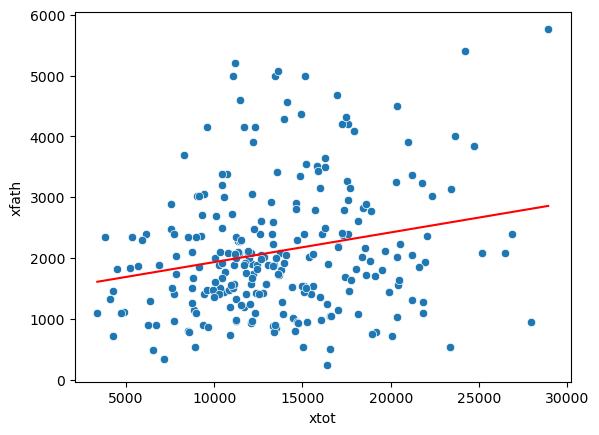

In [5]:
import seaborn as sns

y_hat = results.predict(X)

sns.scatterplot(x='xtot', y='xfath', data=df)
sns.lineplot(x='xtot', y=y_hat, data=df, color='red');


**Task 2:** Perform scatterplots of the residuals from the regression against xtot and the predicted value of food consumption, separately.What shall you expect given the assumptions presented in the lectures? Should you expect the total expediture to correlate with the residuals? 

_Hint:_
You can access the residuals using the `.resid` property of your results object.

_Pro tip:_ You can manually change the labels of the y- and x-axis of Seaborn plots by adding `.set(ylabel="Residuals", xlabel="xtot")` to the end of your plot command

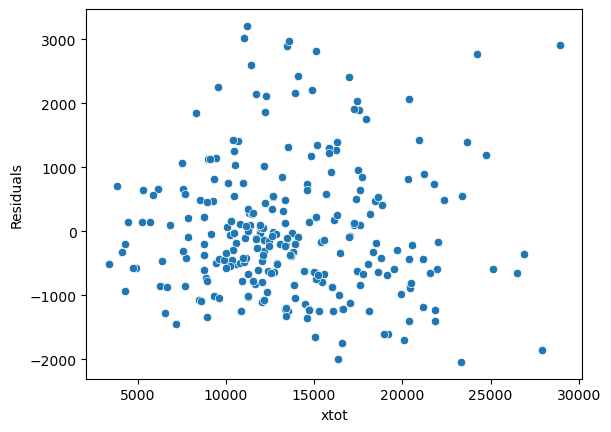

In [6]:
#Task 2a 
sns.scatterplot(x='xtot', y=results.resid, data=df).set(ylabel='Residuals');

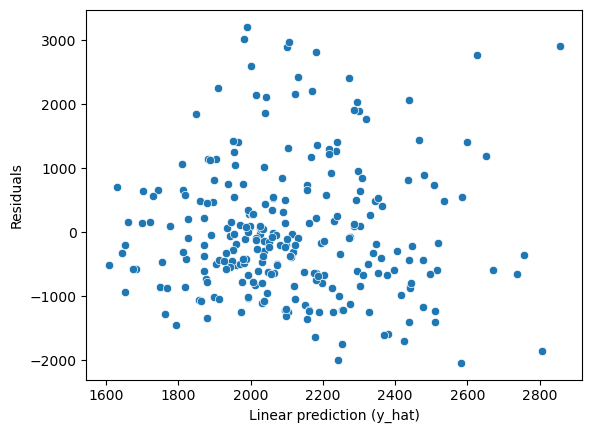

In [7]:
# Task 2b
sns.scatterplot(x=y_hat, y=results.resid).set(xlabel='Linear prediction (y_hat)', ylabel='Residuals');

Remember the mechanical properties of the OLS estimator: The residuals sum to zero, $E(u)=0$, and are always uncorrelated with the explanatory variables, $E(x|u)=0$

### Exercise 2: Estimate model (2)

In this exercise, we are going to estimate model (2) for men and women individually:
$$
\frac{\text{xfath}_i}{\text{xtot}_i} = \delta_0 + \delta_1 \log \left(\frac{\text{xtot}_i}{\text{price}_i}
\right) + v_i \tag{2}
$$


**Task 1:** Construct the variables needed to estimate model (2). 

_Hint:_ The $\text{price}_i$ variable is included in the dataset under the name `price`.


**Your code:**

In [8]:
import numpy as np

df = pd.read_stata('PS2.dta') # Indlæs datasættet igen, da vi før ændrede det så mænd ikke længere var med

df['wfath'] = df.xfath / df.xtot # Opret en ny variabel for food expenditure share
df['wcloth'] = (df.xwcloth + df.xmcloth) / df.xtot # variabel for clothing expenditure share
df['walc'] = df.xalc / df.xtot # variabel for alcohol expenditure share
df ['log_xtot_adj'] = np.log(df.xtot / df.price) # variabel for deflated total expenditure


**Task 2:** Estimate model (2) by OLS for the budget shares of food, clothing and alcohol for men and women, separately. For each gender and each of the three expenditure categories, print the estimated slope parameters. 

_Hint_: Write a nested for-loop where you estimate the model and print the parameter estimate for each of the genders and and each of the three dependant variables. 

To access the individual model parameters, you can use the `.params` property of the results object. For example, if you have an explanatory variable called `log_xtot_adj`, you can access the parameter estimate like this:


```py
model = sm.OLS(y, X)
results = models.fit()
delta1 = results.params['log_xtot_adj']
```

**Your code:**

In [9]:
for gender in [0, 1]:
    for var in ['wfath', 'wcloth', 'walc']:
        data = df[df.dmale == gender] # Begræns datasættet til kun mænd eller kvinder
        
        X = data[['log_xtot_adj']].copy() # Sæt uafhængig variabel
        X['const'] = 1 # Tilføj en konstant til modellen
        y = data[var] # Sæt afhængig variabel

        results = sm.OLS(y, X).fit() # Estimer modellen
        delta1 = results.params['log_xtot_adj'] # Hent delta1

        print(gender, var, delta1.round(5)) # Print køn, afhængig variabel og delta1 for hver model

0 wfath -0.11057
0 wcloth 0.0744
0 walc 0.00732
1 wfath -0.11708
1 wcloth 0.02178
1 walc 0.01906


**Task 3:** Interpret the estimation results in light of the discussion on luxury versus necessity goods (see group work). Which parameter is central to the analysis? What conclusions can be drawn on the basis of the analysis?

**Your answer:**

Hældningskoefficienten er den centrale parameter. Hvis positiv er det et luksusgode og negativ svarer til et nødvendigt gode. Konstanten er som tidligere nævnt svært at give en økonomisk fortolkning.
- Mad er et nødvendigt gode. Estimaterne er stort set ens for mænd og kvinder.

- Tøj er et luksusgode. Mest udpræget for kvinder
- Alkohol er et luksusgode, mest udpræget for mænd. For kvinder er estimatet tæt på nul.


## Theoretical exercise
Solve the following theoretical exercises (using pen and paper). Estimated time for the exam is 30
minutes.

**Task 1:**
Write up the simple linear regression model (SLR) with a constant term and 1
explanatory variable in matrix form for $n$ observations.

**Task 2:** Write the OLS estimator in matrix form. Show that when one
calculates the OLS estimator, then: 
\begin{equation*}
\widehat{\beta }_{0}=\bar{y}-\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y%
})}{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}}\bar{x},\qquad \widehat{\beta }_{1}=%
\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{n}(x_{i}-%
\bar{x})^{2}}
\end{equation*}%
where $\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_{i}$ and $\bar{y}=\frac{1}{n}%
\sum_{i=1}^{n}y_{i}$.

_Hints_: Use the following rule for inverting a matrix: 
\begin{equation*}
\left[ 
\begin{array}{cc}
a & b \\ 
c & d%
\end{array}%
\right] ^{-1}=\frac{1}{ad-bc}\left[ 
\begin{array}{cc}
d & -b \\ 
-c & a%
\end{array}%
\right]
\end{equation*}
as well rules (A.7) and (A.8) in Math Refresher A in the textbook.


**Answer:**


Antagelser og definitioner: 


- $n$ individer 
- afhængig variabel $y$ 
- forklarende variabel $x$ 
- fejlled $\epsilon$ 
- parametervektor $\beta$ 

Regressionsmodel på matrixform: 
\begin{align*}
&\left[ 
\begin{array}{c}
y_1 \\ 
y_2 \\ 
. \\ 
. \\ 
. \\ 
y_n%
\end{array}%
\right] = \left[ 
\begin{array}{cc}
1 & x_1 \\ 
1 & x_2 \\ 
. & . \\ 
. & . \\ 
. & . \\ 
1 & x_n%
\end{array}%
\right] \left[ 
\begin{array}{cc}
\beta_0 & \beta_1%
\end{array}%
\right] + \left[ 
\begin{array}{c}
\epsilon_1 \\ 
\epsilon_2 \\ 
. \\ 
. \\ 
. \\ 
\epsilon_n%
\end{array}%
\right] \\
\\
&\implies Y = X \beta + \epsilon
\end{align*}
Note: $Y$ er en $(n\times 1)$-matrix, $X$  er en $(n\times 2)$-matrix, $\beta$ er en  $%
(2\times 1)$-matrix, $\epsilon$ er en $n \times 1$-matrix.

OLS estimatoren på matrixform: $\widehat{\beta}%
=\left(X^{\prime }X\right)^{-1}X^{\prime }Y$

Opstil relevante matricer:  
\begin{align*}
(X^{\prime }X) &= \left[%
\begin{array}{cc}
n & \sum_i x_i \\ 
&  \\ 
\sum_i x_i & \sum_i x_i x_i%
\end{array}
\right] \\
\\
(X^{\prime }Y) &= \left[%
\begin{array}{c}
\sum_i y_i \\ 
\\ 
\sum_i x_i y_i%
\end{array}
\right]
\end{align*}
Inverter $(X^{\prime }X)$ ved hjælp af regneregel:  
\begin{align*}
(X'X)^{ -1} &= \left[%
\begin{array}{cc}
n & \sum_i x_i \\ 
&  \\ 
\sum_i x_i & \sum_i x_i x_i%
\end{array}
\right]^{-1} = \frac{1}{n\sum_i x_i x_i - \sum_i x_i \sum_i x_i} \left[%
\begin{array}{cc}
\sum_i x_i x_i & -\sum_i x_i \\ 
&  \\ 
-\sum_i x_i & n%
\end{array}
\right] \\
\\
&=\frac{1}{n\sum_i x_i x_i - n \sum_i x_i \bar{x}} \left[%
\begin{array}{cc}
\sum_i x_i x_i & -\sum_i x_i \\ 
&  \\ 
-\sum_i x_i & n%
\end{array}
\right] \quad \text{(omskriv sum til gennemsnit)} \\
\\
&=\frac{1}{n\sum_i x_i(x_i - \bar{x})} \left[%
\begin{array}{cc}
\sum_i x_i x_i & -\sum_i x_i \\ 
&  \\ 
-\sum_i x_i & n%
\end{array}
\right] \quad \text{(omskriv nævner i br\o k)} \\
\\
&=\frac{1}{n\sum_i (x_i - \bar{x})^2} \left[%
\begin{array}{cc}
\sum_i x_i x_i & -\sum_i x_i \\ 
&  \\ 
-\sum_i x_i & n%
\end{array}
\right] \quad \text{(omskriv nævner vha. (A.7) og (A.8))} \\
\\
&=\frac{1}{\sum_i (x_i - \bar{x})^2} \left[%
\begin{array}{cc}
\frac{\sum_i x_i x_i}{n} & -\bar{x} \\ 
&  \\ 
-\bar{x} & 1%
\end{array}
\right] \quad \text{(divider igennem med } n)
\end{align*}
OLS estimatoren kan derfor opskrives som:  
\begin{align*}
\widehat{\beta}=\frac{1}{\sum_i (x_i - \bar{x})^2} \underbrace{ \left[%
\begin{array}{cc}
\frac{\sum_i x_i x_i}{n} & -\bar{x} \\ 
&  \\ 
-\bar{x} & 1%
\end{array}
\right]\left[%
\begin{array}{c}
\sum_i y_i \\ 
\\ 
\sum_i x_i y_i%
\end{array}
\right] }_{(\star)}
\end{align*}
Lad os fokusere på 
$(\star)$ som skal manipuleres yderligere for at vise det ønskede resultat.

\begin{align*}
(\star) &= \left[%
\begin{array}{cc}
\frac{\sum_i x_i x_i}{n} & -\bar{x} \\ 
&  \\ 
-\bar{x} & 1%
\end{array}
\right]\left[%
\begin{array}{c}
\sum_i y_i \\ 
\\ 
\sum_i x_i y_i%
\end{array}
\right] \\
\\
&= \left[%
\begin{array}{c}
\frac{1}{n} \sum_i y_i \sum_i x_i x_i -\bar{x}\sum_i x_i y_i \\ 
\\ 
-\bar{x} \sum_i y_i+ \sum_i x_i y_i%
\end{array}
\right] \quad \text{(gang matricerne sammen)} \\
\\
&=\left[%
\begin{array}{c}
\bar{y} \sum_i x_i x_i -\bar{x}\sum_i x_i y_i +\left( \bar{y} \bar{x} \sum_i
x_i - \bar{y} \bar{x} \sum_i x_i \right) \\ 
\\ 
\sum_i y_i(x_i -\bar{x})%
\end{array}
\right] \quad \text{(trick: læg nul til)} \\
\\
&=\left[%
\begin{array}{c}
\bar{y} \sum_i x_i (x_i-\bar{x}) -\bar{x}\sum_i x_i (y_i-\bar{y}) \\ 
\\ 
\sum_i y_i(x_i -\bar{x})%
\end{array}
\right] \quad \text{(diverse omskrivninger)} \\
\\
&=\left[%
\begin{array}{c}
\bar{y} \sum_i (x_i-\bar{x})^2 -\bar{x}\sum_i (x_i-\bar{x}) (y_i-\bar{y}) \\ 
\\ 
\sum_i (y_i-\bar{y})(x_i -\bar{x})%
\end{array}
\right] \quad \text{(brug (A.7) og (A.8))}
\end{align*}

Ergo opskrives OLS estimatoren som:  

\begin{align*}
\widehat{\beta}&=\frac{1}{\sum_i (x_i - \bar{x})^2} \left[%
\begin{array}{c}
\bar{y} \sum_i (x_i-\bar{x})^2 -\bar{x}\sum_i (x_i-\bar{x}) (y_i-\bar{y}) \\ 
\\ 
\sum_i (y_i-\bar{y})(x_i -\bar{x})%
\end{array}
\right] \\
\\
&= \left[%
\begin{array}{c}
\bar{y} -\bar{x}\frac{\sum_i (x_i-\bar{x}) (y_i-\bar{y})}{\sum_i (x_i-\bar{x}%
)^2} \\ 
\\ 
\frac{\sum_i (y_i-\bar{y})(x_i -\bar{x})}{\sum_i(x_-\bar{x})^2}%
\end{array}
\right]
\end{align*}
